In [2]:
#Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Archivo
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Wine.csv', header=None)

In [6]:
# 1- Eliminar primera columna
data = data.drop(0,axis=1)
#Agregar nombres a las columnas para facilitar su uso
columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13']
data.columns = columns

In [7]:
# Metodo min max
new_data = data
for col in new_data.columns:
  new_data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

new_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


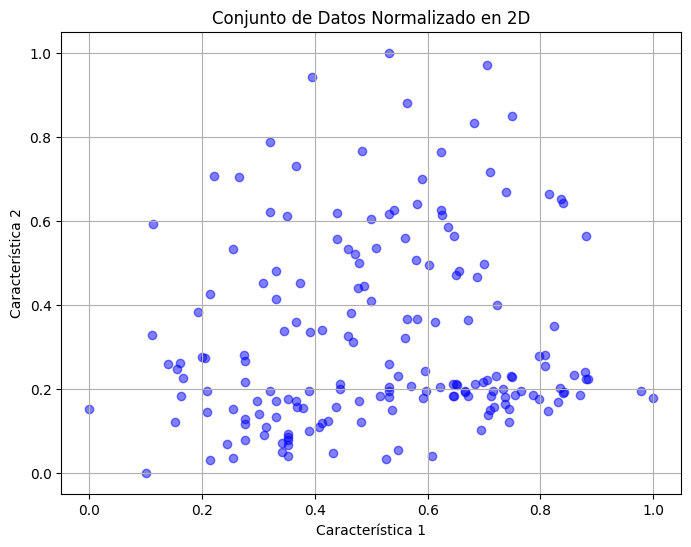

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(new_data.iloc[:, 0], new_data.iloc[:, 1], c='b', marker='o', alpha=0.5)
plt.title('Conjunto de Datos Normalizado en 2D')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True)
plt.show()

In [10]:
#Distancia euclidiana
import math
import numpy as np


n = len(new_data)
dist_m = np.zeros((n, n))

for i in range(n):
    for j in range(i + 1, n):
        p1 = new_data.iloc[i]
        p2 = new_data.iloc[j]

        sum = 0

        for col in new_data.columns:
            sum += (p1[col] - p2[col]) ** 2

        euclidiana_d = math.sqrt(sum)
        dist_m[i][j] = euclidiana_d
        dist_m[j][i] = euclidiana_d

dist_m

array([[0.        , 0.62683248, 0.57331769, ..., 1.42788461, 1.35195151,
        1.52021614],
       [0.62683248, 0.        , 0.72090904, ..., 1.33922263, 1.27502377,
        1.49688615],
       [0.57331769, 0.72090904, 0.        , ..., 1.28971502, 1.22263247,
        1.34533449],
       ...,
       [1.42788461, 1.33922263, 1.28971502, ..., 0.        , 0.39924775,
        0.60992201],
       [1.35195151, 1.27502377, 1.22263247, ..., 0.39924775, 0.        ,
        0.6145566 ],
       [1.52021614, 1.49688615, 1.34533449, ..., 0.60992201, 0.6145566 ,
        0.        ]])

In [11]:
# Sammon
X = new_data
n = 2
# Numero maximo de iteraciones
maxiter = 500
# Tolerancia de error
tolfun = 1e-9
N, dim = X.shape
scale = 0.5 / np.sum(dist_m)
# Y aleatorio
Y = np.random.rand(N, n)
E = 0  # Error inicial

for _ in range(maxiter):
    # Calcula las distancias en el espacio Y
    dist_y = np.zeros((N, N))
    for i in range(N):
        for j in range(i + 1, N):
            p1 = Y[i]
            p2 = Y[j]
            sum = 0
            for z in range(n):  # Itera sobre las dimensiones de Y
                sum += (p1[z] - p2[z]) ** 2
            euclidiana_y = math.sqrt(sum)
            dist_y[i][j] = euclidiana_y
            dist_y[j][i] = euclidiana_y

    yD = np.array(dist_y)
    yD[yD == 0] = 1e-10  # Evita divisiones por cero

    # Calcula las diferencias entre las distancias en X y Y
    delta = dist_m - yD
    E_new = np.sum((delta**2) / (dist_m**2))

    # Detiene la optimización si la mejora es pequeña
    if np.abs((E - E_new) / E) < tolfun:
        break

    E = E_new  # Actualiza el error

    # Actualiza las posiciones en Y
    for i in range(N):
        for k in range(n):
            gradient = 0
            for j in range(N):
                if i != j:
                    gradient += (delta[i][j] / dist_m[i][j] - delta[i][j] / yD[i][j]) * (Y[i][k] - Y[j][k])
            Y[i][k] = Y[i][k] - scale * gradient

print(Y)


<ipython-input-11-4f7c253a279e>:33: RuntimeWarning: divide by zero encountered in divide
  E_new = np.sum((delta**2) / (dist_m**2))
<ipython-input-11-4f7c253a279e>:36: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs((E - E_new) / E) < tolfun:


[[ 7.17094665e-01  7.42836690e-01]
 [ 5.78241266e-01  2.97798115e-01]
 [ 1.83158552e-01 -8.75733548e-02]
 [ 4.14921122e-01  2.61102847e-01]
 [ 1.74053965e-01  2.64313101e-01]
 [ 3.73300590e-01  1.20397069e+00]
 [ 6.63301660e-01  6.71518681e-03]
 [ 7.88937735e-01  8.21090469e-01]
 [ 1.05655315e+00  1.10453398e+00]
 [ 5.07795422e-01 -1.75212966e-01]
 [ 5.58544122e-01  7.55567783e-01]
 [ 3.17559312e-01 -5.33382784e-02]
 [ 1.01537530e+00  3.20555553e-01]
 [ 7.02052483e-01  1.16066706e-01]
 [ 5.44586693e-01  1.13778635e+00]
 [ 8.82844809e-01  1.00551170e+00]
 [ 3.28708041e-01  4.32053061e-01]
 [ 1.08151102e+00  3.12587265e-02]
 [ 2.50688888e-01 -3.75766793e-01]
 [ 9.85137980e-01  4.63701847e-01]
 [-1.32831348e-01  3.92429295e-01]
 [ 1.07107821e-01  9.56301673e-01]
 [ 8.27509252e-01  6.44982945e-01]
 [ 1.13165450e+00  8.47895612e-01]
 [-1.81736394e-01  6.80831280e-01]
 [ 1.14778963e+00  2.58149236e-01]
 [ 1.83185198e-01  4.07623809e-01]
 [-9.15129071e-03 -1.27642278e-01]
 [ 2.39793377e-01  4

<ipython-input-12-102d447e601d>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y[:, 0], Y[:, 1], cmap='viridis')


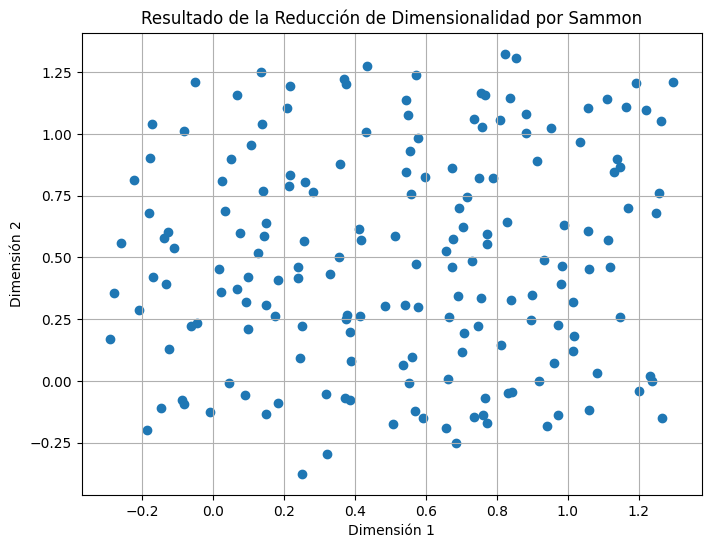

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], cmap='viridis')
plt.title('Resultado de la Reducción de Dimensionalidad por Sammon')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()